In [10]:
print('Im working!')

Im working!


# Feature Selection
We will be using the titanic dataset from kaggle, to explore our subjects and provide concrete examples. This data set contains information about the survivors and not-survivors of the famous titanic incident. We will start by describing the data of the titanic and see how feature selection can help improve our accuracy and execution speed of our models. 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns

## Data
The titanic dataset includes this features:
- PassengerID
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp (# of siblings/spouses on board)
- Parch (# of parents/children on board)
- Ticket
- Fare
- Cabin
- Embarked

We are going to be trying to predict the Survived binary class using the other variables as inputs on our models.

In [14]:
# Read the dataset
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
# Since there are a lot of missing values in ticket and cabin we will drop them
df = df.drop(['Ticket','Cabin'], axis=1) 
df = df.dropna()

## Train/Test validation split
Here we are dividing our data set into testin and validation, this is done to avoid issues like overfitting.

In [16]:
# Split our training data for training + validation
from sklearn.model_selection import train_test_split

# Which columns to grab from the dataset
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Grab the columns for the transformation
all_X = df[columns]
all_y = df['Survived']

# Define our train and test sets
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)


## Visual exploration of our data
We are going to explore our dataset visually to see if we can detect any 'important' or disctinct features. First the distribution of survival of our training dataset to see if there is a huge disparity between classes.  

Text(0.5, 1.0, 'Distribution of Survival')

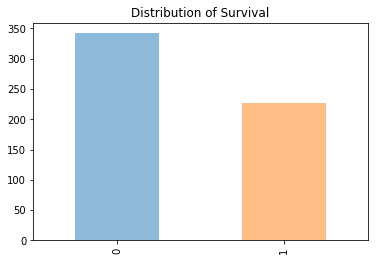

In [18]:
# Plots a bar graph to show quickly how many people survived               
train_X.Survived.value_counts().plot(kind='bar', alpha = 0.5)
plt.title("Distribution of Survival")

* As we can see much more people died on the incident that the ones that survived. Next is a plot of survival by age.

Text(0.5, 1.0, 'Survival by Age')

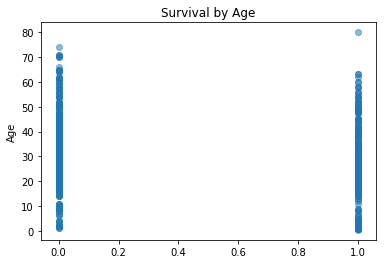

In [19]:
# Scatter plot of those who survived and age
plt.scatter(df.Survived, df.Age, alpha=.5)
# Axis labels and title of the graph
plt.ylabel("Age")                          
plt.title("Survival by Age")

* We can see that survival could be leaning towards younger people, but it is not quite clear.

Text(0.5, 1.0, 'Passenger Age Distribution')

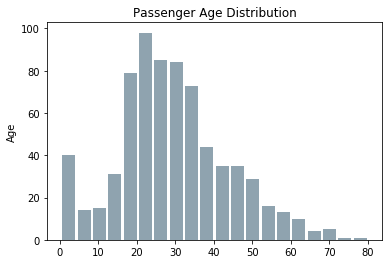

In [30]:
# Plot a histogram of Age
plt.hist(x=df.Age, bins='auto', color='#607c8e',
                            alpha=0.7, rwidth=0.85)
plt.ylabel("Age")                          
plt.title("Passenger Age Distribution")

* Histogram of age, we can see that the age of the titanic passangers was leaning towards the 20's - 30's range.

C:\Users\Charx\Anaconda2\envs\variableSelectionEnv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


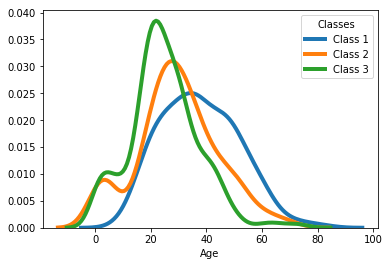

In [32]:
# Density Plot and Histogram 
sns.distplot(train_X.Age[df.Pclass == 1], hist=False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )
sns.distplot(train_X.Age[df.Pclass == 2], hist=False, kde=True,   
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )
sns.distplot(train_X.Age[df.Pclass == 3], hist=False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )

plt.legend(('Class 1','Class 2','Class 3'),prop={'size': 10}, title = 'Classes')
# Minor bug with scipy


* Now passenger class by age and class, this hints that there were a lot of passengers from the third class that were very young and not su much on the upper class

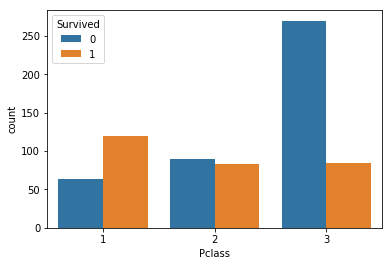

In [43]:
sns.countplot(x="Pclass", hue="Survived", data=df)

* And finally the count of survival by passenger class clearly indicates that passengers from the third class were the ones that most likely did not survive the incident.

### Summary
That was a lot of work for just 2 variables imagine reapeting it for every variable in our data-set by hand, wouldn't it be much more efficient if there was a way to determine the importance of a variable via something else? Filter and Wrapper methods to the rescue!

# 1. Filter Methods
**Filters** evaluate features using intrinsic properties of the data, they select candidate features, then calculate the subset score of those features and only after that we evaluate our model based on the performance of the instrisic properties.
### Advantages
<br>
Good when core pattern recognition cannot be performed on the full dataset, ie evaluation of our model is computationaly costly!

### Disadvantages
<br>
Implies a new model and a set of assuptions about our data, for example, normality assuption, linear dependance etc.
<br>

## 1.1 ANOVA as a filtering method
Ranking variables according to some statistic and deciding to include them in the model according to such statistic result, analysis of variance calculates de F-Statistic to see how different are the means of the distributions of our data according to our classes in this case 1 for survivor 0 not surviving.

In [47]:
# Next one we are going to consider Sex, Pclass, Fare, Embarked and SibSp(number of siblings and spouses), parch (Number 
#    parents and children one is travelling with), Embarked(the port where the passenger embarked)

# Pclass
pClassSurvived = train_X.Pclass[df.Survived == 1]
pClassNotSurvived = train_X.Pclass[df.Survived == 0]
# Sex
#sexSurvived = df.Sex[df.Survived == 1]
#sexNotSurvived = df.Sex[df.Survived == 0]
# Siblings
sibSpSurvived = train_X.SibSp[df.Survived == 1]
sibSpNotSurvived = train_X.SibSp[df.Survived == 0]
# Parents & Children
parchSurvived = train_X.Parch[df.Survived == 1]
parchNotSurvived = train_X.Parch[df.Survived == 0]
# Where embarked?
#embarkedSurvived = df.Embarked[df.Survived == 1]
#embarkedNotSurvived = df.SibSp[df.Survived == 1]
# Fare
fareSurvived = train_X.Fare[df.Survived == 1]
fareNotSurvived = train_X.Fare[df.Survived == 0]

fAge, pAge = stats.f_oneway(ageSurvived, ageNotSurvived)
fClass, pClass = stats.f_oneway(pClassSurvived, pClassNotSurvived)
fSib, pSib = stats.f_oneway(sibSpSurvived, sibSpNotSurvived)
fParch, pParch = stats.f_oneway(parchSurvived, parchNotSurvived)
fFare, pFare = stats.f_oneway(fareSurvived, fareNotSurvived)

print("The p-value of Age is: " + str(pAge))
print("The p-value of Class is: " + str(pClass))
print("The p-value of # of Siblings is: " + str(pSib))
print("The p-value of # of Parents and children is: " + str(pParch))
print("The p-value of Fare is: " + str(pFare))

The p-value of Age is: 0.16169995412816476
The p-value of Class is: 5.487184140399378e-20
The p-value of # of Siblings is: 0.46609165802064034
The p-value of # of Parents and children is: 0.017105880263189474
The p-value of Fare is: 1.0265102576807696e-11


### Anova Results

Here we can see that the various values of the F-statistic if we consider a cutpoint of p < 0.05 for statistical significance then we should just consider with less than $0.05$ for our model and then rank them according to their results, the smaller the p-value the highest the feature will rank. We can see that Class and Fare had the lowest P-values, so our hypothesis of passenger class having a strong relationship with survival gets statistical support.

### Analysis
We are not going to consider the variables Siblings, the $p-value$ is way above our $0.05$ 
threshold.
<br> 

The $p-value$ of Class is much smaller than that of Age s|o it is considered much more statistically significant, the probability of this variation being caused by randomness is almost 0.

<br>

Our hypothesis of the difference in means gets some statistical evidence this way we would pick **Class** then **Fare** and finally **Parch** to be predictors of the Variable **"Titanic Survivor"** in our filtering system we would rank class a much better predictor than age.

### Disadvantages
One of the disadvantages of ANOVA is that it can not be done with categorical variables such as Sex, or Embarked, we are going to either perform some type of encoding or perform a different kind of statistical test ($\chi^2$ - test for example) to determine how good a predictor they are or not.

## 1.2 Second approach correlation with the target variable
<br>
We are going to use correlation as a filter method for variable selection in our titanic dataset
In statistics **Correlation** measures dependance or association of two random variables. We must be cautios as **Correlation** does not imply causation. Correlation can detect linear dependencies between a predictor variable and target variable.
We will be using Pearsons Correlation Coefficient $\rho$
<br>
<br>
$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$
<br>
<br>
Correlation varies between $-1$ and $1$ and indicates how much a variable moves in a certain way if the other one moves to $-1$ indicates perfect negative correlation (when the first variable increases the other one decreases with a fixed proportion) and 1 perfect positive correlation, $0$ indicates no correlation between the two variables.



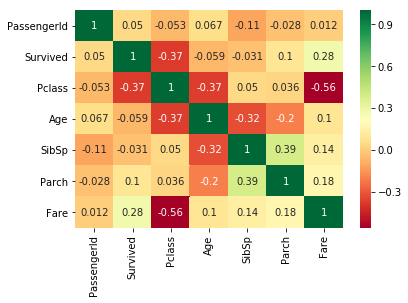

In [50]:
# We are going to use a Seaborn heatmap for correlation between the target variable 'Survived' and all the other variables
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(train_X)

## Correlation Results
We will now take a look at the correlation between Survived and the other ones and pick the ones with correlations either negative or positive in this case **PClass** with $-0.37$ and **Fare** with $0.28$ as we can see the anova results and the correlation results are turning to be very similar. Another thing can be concluded in our correlation analysis, maybe **Passenger Class** and **Fare** are redundant variables since they are highly correlated, we should run the model with only **Passenger Class** and the third most correlated variable and check our results!

## 1.3 Information Theory, Entropy and Information Gain
The last approach we are going to consider is the information value of a variable, we are going to be using entropy and information gain as a way to rank the predictive power of our variables. **Entropy** measures how predictable are events. **Higher entropy** means there is **more unpredictability** in the events being measured. In other words 100% predictability = 0 entropy. In contrast a 50% 50% chance is entropy of one!
Following this conception we should **pick the variable which gives us the greatest decrease in entropy** and that is information Gain.
### Information Gain
Decision Trees use information gain as a mesure of impurity and a way to split the leaf nodes.

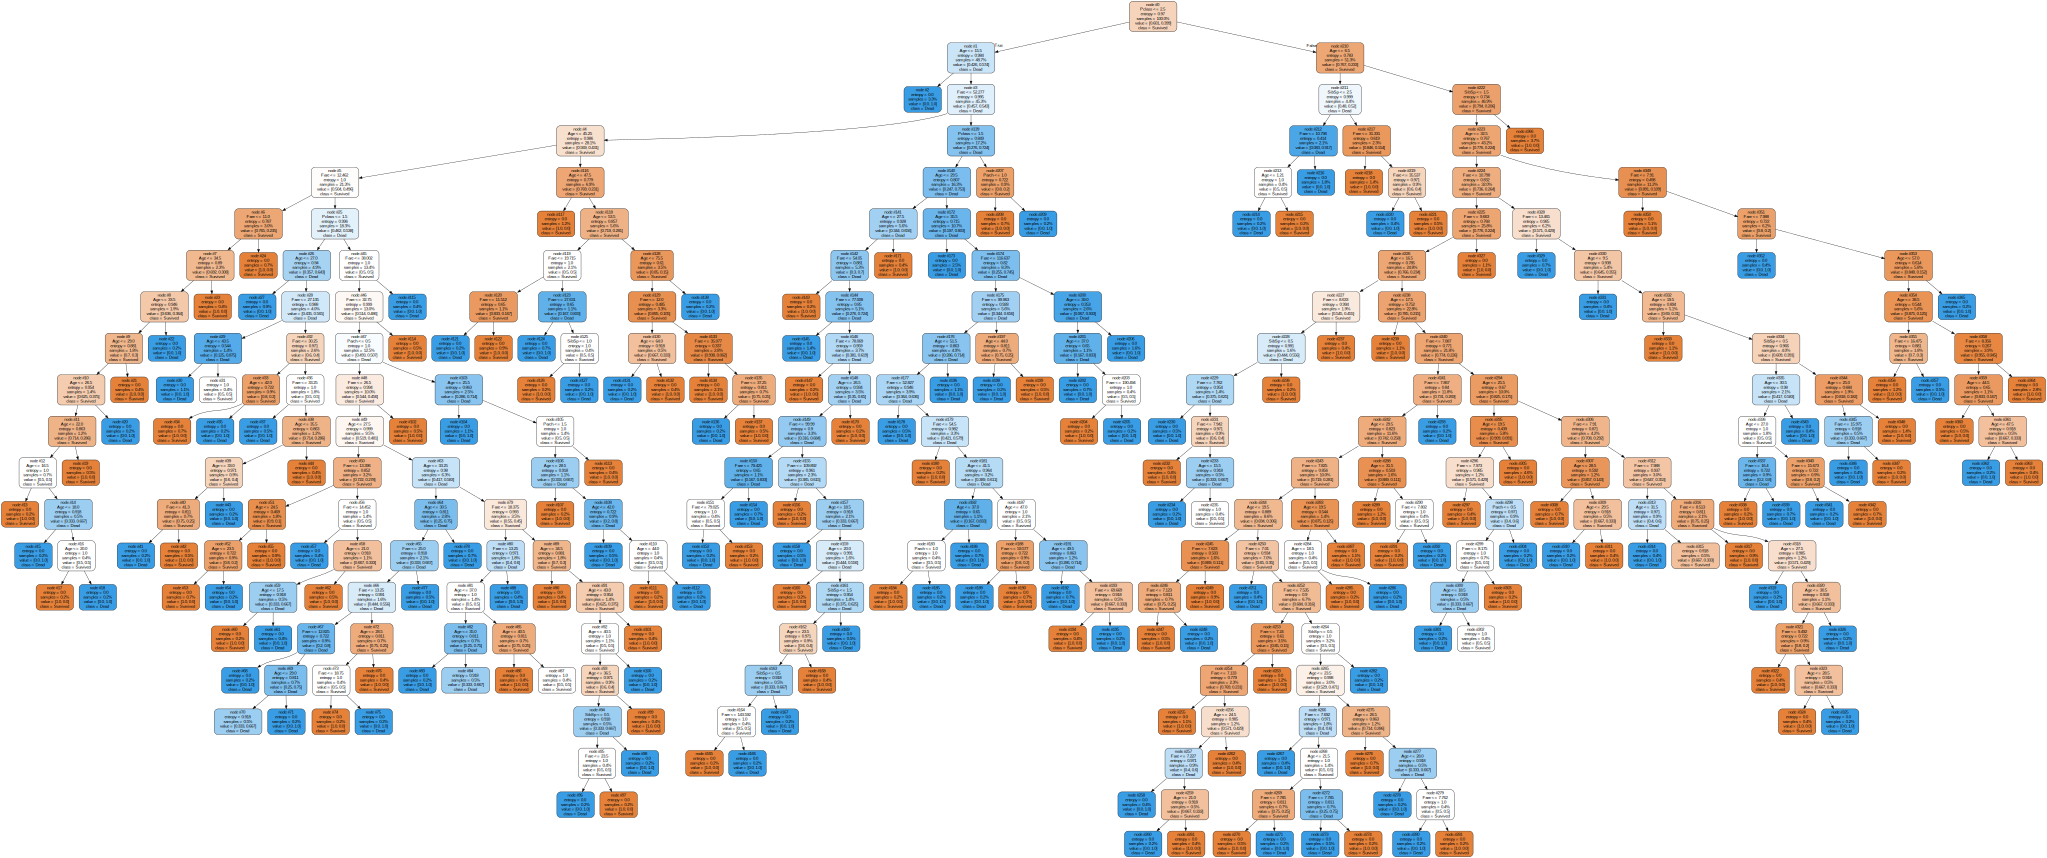

In [52]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image
from io import StringIO
import pydotplus
import graphviz



# Remove the features that need pre-processing
treeTrain = train_X[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
treeTest = train_X['Survived']

# Fit a decision tree model based on entropy to the data
decisionTree = DecisionTreeClassifier(criterion = 'entropy').fit(treeTrain,treeTest)

# Print feature importances
#print('Feature Importances according to the decision tree: ')
#for name, importance in zip(treeTrain.columns, decisionTree.feature_importances_):
#    print(name, importance)

    
# Visualize the tree
dot_data = tree.export_graphviz(decisionTree,
                                out_file=None,
                                node_ids = True,
                                proportion = True,
                                filled = True,
                                feature_names= treeTrain.columns,
                                class_names=['Survived', 'Dead'],
                                rounded = True)
graph = graphviz.Source(dot_data)
#export_graphviz(decisionTree, out_file="graph.dot")
graph


## Decision tree Results
The new approach showed that Age and Pclass where the most promising in terms of spliting so we are goint to use them for our logistics model.

## 1.4 Model Comparison
We are going to use logistic regression as a mean to compare the results obtained with each method, first we will run our model with the variables selected by the ANOVA approach, then with the correlation variables and finally with the decision tree split.

In [59]:
from sklearn.linear_model import LogisticRegression
# Which Variables are we using according to the anova analysis
anovaVariables = ['Pclass', 'Fare', 'Parch']
# Create an instance of the lr
lr = LogisticRegression()

#df[['Pclass', 'Fare']]
# Run the model
lr.fit(train_X[anovaVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[anovaVariables]

#test.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)

# Make predictions on the test set
predictions = lr.predict(testVariables)
# Use score method to get accuracy of model

score = lr.score(testVariables, test_y)
print("The model prediction score using ANOVA is: " + str(score))

# Which Variables are we using according to the correlation analysis
correlationVariables = ['Pclass', 'Fare']
# Create an instance of the lr
lr = LogisticRegression()

#df[['Pclass', 'Fare']]
# Run the model
lr.fit(train_X[correlationVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[correlationVariables]

#test.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)

# Make predictions on the test set
predictions = lr.predict(testVariables)
# Use score method to get accuracy of model

score = lr.score(testVariables, test_y)

print("The model prediction score using Correlation is: " + str(score))

# Which Variables are we using according to the decision tree
treeVariables = ['Age', 'Pclass']
# Create an instance of the lr
lr = LogisticRegression()

# Run the model
lr.fit(train_X[treeVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[treeVariables]

# Make predictions on the test set
predictions = lr.predict(testVariables)

# Use score method to get accuracy of model
score = lr.score(testVariables, test_y)

print("The model prediction score using decision trees with entropy is: " + str(score))

The model prediction score using ANOVA is: 0.6573426573426573
The model prediction score using Correlation is: 0.6363636363636364
The model prediction score using decision trees with entropy is: 0.7062937062937062


### Filter Methods Results
Model prediction is based on the True Positive rate vs the Predicted positives, this means that we had a 68% chance of being correct in our predictions.
<br>
<br>
Our model prediction score using **ANOVA** was **65%** ... quite bad if you ask me maybe we should try another approach for variable selection.
<br>
<br>
Next, if we use **correlation** for our feature selection criteria we will get **63%** as our score, even worse than with ANOVA, correlation is computationally eficient but not good with non-linear relationships.
<br>
<br>
finally if we use **decision trees with entropy as split criteria** as a mean of selecting our variables we obtain the best results with a **70%** prediction score. Not Bad!

# 2. Wrapper Methods

We will use the random forest algorithm. This method is part of the scikit package and requires all features to be continueous values. Thus pre-processing of the data is imperative. All categorical features will be encoded into one-hot arrays. It is known that such an approach can hurt performance. 

In [64]:
# Read the dataset again for the wrapper analysis
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
df

# Since there are a lot of missing values in ticket and cabin we will drop them
# Additionally features like Name and PassengerId carry no apparent importance as features, so they will also be removed, 
# before applying encoding on our categorical values 
df = df.drop(['Name', 'PassengerId', 'Ticket','Cabin'], axis=1) 
df = df.dropna()

# Encoding our categorical data into one-hot arrays
# Encode Pclass, Sex and Embarked features
sex_enc = pd.get_dummies(df['Sex'])
embarked_enc = pd.get_dummies(df['Embarked'])
pclass_enc =  pd.get_dummies(df['Pclass'])

# Survived feature will be our independent variable
survived = df['Survived']

# Remove existing columns 
# Survived feature removed so as not to correlate 100% with only one feature during feature subset selection
df = df.drop(['Survived', 'Sex', 'Embarked', 'Pclass'], axis=1)

# Replace them with encoded ones
df = df.join(sex_enc)
df = df.join(embarked_enc)
df = df.join(pclass_enc)
df.columns = ['Age', 'SibSp', 'Parch', 'Fare', 
              'female', 'male', 
              'Embarked_C', 'Embarked_Q', 'Embarked_S', 
              'Pclass_1', 'Pclass_2', 'Pclass_3']
print(df[50:60])

# Split our training data for training + validation
from sklearn.model_selection import train_test_split

# Which columns to grab from the dataset
columns = ['Age', 'SibSp', 'Parch', 'Fare', 
            'female', 'male', 
            'Embarked_C', 'Embarked_Q', 'Embarked_S', 
            'Pclass_1', 'Pclass_2', 'Pclass_3']

# Grab the columns for the transformation
all_X = df[columns]
all_y = survived

# Define our train and test sets
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)
print('Training dataset shape:', train_X.shape, train_y.shape)
print('Testing dataset shape:', test_X.shape, test_y.shape)

      Age  SibSp  Parch     Fare  female  male  Embarked_C  Embarked_Q  \
68  17.00      4      2   7.9250       1     0           0           0   
69  26.00      2      0   8.6625       0     1           0           0   
70  32.00      0      0  10.5000       0     1           0           0   
71  16.00      5      2  46.9000       1     0           0           0   
72  21.00      0      0  73.5000       0     1           0           0   
73  26.00      1      0  14.4542       0     1           1           0   
74  32.00      0      0  56.4958       0     1           0           0   
75  25.00      0      0   7.6500       0     1           0           0   
78   0.83      0      2  29.0000       0     1           0           0   
79  30.00      0      0  12.4750       1     0           0           0   

    Embarked_S  Pclass_1  Pclass_2  Pclass_3  
68           1         0         0         1  
69           1         0         0         1  
70           1         0         1         0

# Wrapper

Now we are going to perform forward feature selection on our encoded variables, forward feature selection uses a black-box method to determine if a variable is good or not by running our model in this case a Random Forest Classifier many times and comparing the results obtained.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=3, #12 for full accuracy plot
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(train_X, train_y)

feat_cols_ff = list(sfs1.k_feature_idx_)
print(feat_cols_ff)

sfs1.subsets_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.2s finished

[2018-10-02 21:31:09] Features: 1/3 -- score: 0.776821854559446[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   17.3s finished

[2018-10-02 21:31:27] Features: 2/3 -- score: 0.7978761061946903[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[4, 8, 11]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.7s finished

[2018-10-02 21:31:42] Features: 3/3 -- score: 0.808341669873028

{1: {'feature_idx': (4,),
  'cv_scores': array([0.74782609, 0.8       , 0.75221239, 0.78761062, 0.79646018]),
  'avg_score': 0.776821854559446,
  'feature_names': ('female',)},
 2: {'feature_idx': (4, 11),
  'cv_scores': array([0.8       , 0.8       , 0.7699115 , 0.79646018, 0.82300885]),
  'avg_score': 0.7978761061946903,
  'feature_names': ('female', 'Pclass_3')},
 3: {'feature_idx': (4, 8, 11),
  'cv_scores': array([0.82608696, 0.8173913 , 0.77876106, 0.79646018, 0.82300885]),
  'avg_score': 0.808341669873028,
  'feature_names': ('female', 'Embarked_S', 'Pclass_3')}}

## Results
Test the algorith with the selected variables chosen by the model as signicant

In [70]:
from sklearn.metrics import accuracy_score as acc

# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(train_X.iloc[:,feat_cols_ff], train_y)

y_train_pred = clf.predict(train_X.iloc[:,feat_cols_ff])
print('Training accuracy on selected features: %.3f' % acc(train_y, y_train_pred))

y_test_pred = clf.predict(test_X.iloc[:,feat_cols_ff])
print('Testing accuracy on selected features: %.3f' % acc(test_y, y_test_pred))

Training accuracy on selected features: 0.808
Testing accuracy on selected features: 0.762
